# PROJET SERIE TEMPORELLE :  MODELISATION, OPTIMISATION DE L'ÉNERGIE ET DES UNITES DE REFROIDISSEMENT PAR MOHAMED FALILOU FALL

## 1.	MODELISATION DU RENDEMENT INDIVIDUEL DES CLIMATISEURS

### 1.1	EDA (Analyse Exploratoire des Données) et Facteurs d'influence

### 1.1.1 Analayse univariree

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('donnees-clims_batiment.csv')
data.head()

,date,puissance_totale_batiment,puissance_totale_equipement_it,puissance_equipement_it_salle_a1_tableau_a,puissance_equipement_it_salle_a1_tableau_b,puissance_equipement_it_salle_a1_tableau_c,puissance_equipement_it_salle_a2_tableau_a,puissance_equipement_it_salle_a2_tableau_b,puissance_equipement_it_salle_a2_tableau_c,puissance_equipement_it_salle_b1_tableau_a,...,puissance_b1_clim_15_b1_4,puissance_b1_clim_16_b1_3,puissance_b1_clim_17_b1_2,puissance_b1_clim_18_b1_1,puissance_b2_clim_19_b2_1,puissance_b2_clim_20_b2_2,puissance_b2_clim_21_b2_3,puissance_b2_clim_22_b2_4,puissance_b2_clim_23_b2_5,puissance_b2_clim_24_b2_6
0,2024-06-01 00:10:00+00:00,3214.93,2335.94,96.24,115.52,110.39,146.09,149.34,166.48,115.03,...,31.14,35.02,42.45,10.00,32.94,20.20,18.66,2.58,11.94,17.31
1,2024-06-01 00:20:00+00:00,3233.08,2329.39,96.15,115.12,110.27,145.42,148.65,165.24,114.86,...,31.15,36.01,42.93,11.48,41.73,18.72,13.82,2.98,11.52,18.44
2,2024-06-01 00:30:00+00:00,3205.81,2324.69,96.23,114.91,109.76,145.57,148.70,164.45,114.71,...,31.10,35.13,50.23,18.84,31.33,18.87,9.96,3.63,11.95,16.58
3,2024-06-01 00:40:00+00:00,3184.82,2321.89,96.25,115.30,109.64,145.21,148.87,164.43,114.29,...,30.96,35.57,56.17,17.79,31.42,18.96,15.91,3.56,11.87,18.56
4,2024-06-01 00:50:00+00:00,3184.74,2316.07,95.84,115.03,109.71,144.62,148.42,163.91,113.93,...,30.96,35.44,63.74,14.91,32.29,3.82,9.41,3.07,11.48,18.53


In [3]:
print('Le nombre de lignes:', data.shape[0])
print('Le nombre de colonnes:', data.shape[1])

Le nombre de lignes: 17568
Le nombre de colonnes: 126


In [4]:
data.columns

Index(['date', 'puissance_totale_batiment', 'puissance_totale_equipement_it',
       'puissance_equipement_it_salle_a1_tableau_a',
       'puissance_equipement_it_salle_a1_tableau_b',
       'puissance_equipement_it_salle_a1_tableau_c',
       'puissance_equipement_it_salle_a2_tableau_a',
       'puissance_equipement_it_salle_a2_tableau_b',
       'puissance_equipement_it_salle_a2_tableau_c',
       'puissance_equipement_it_salle_b1_tableau_a',
       ...
       'puissance_b1_clim_15_b1_4', 'puissance_b1_clim_16_b1_3',
       'puissance_b1_clim_17_b1_2', 'puissance_b1_clim_18_b1_1',
       'puissance_b2_clim_19_b2_1', 'puissance_b2_clim_20_b2_2',
       'puissance_b2_clim_21_b2_3', 'puissance_b2_clim_22_b2_4',
       'puissance_b2_clim_23_b2_5', 'puissance_b2_clim_24_b2_6'],
      dtype='object', length=126)

In [5]:
# Conversion de la colonne date
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Verification de la conversion
print(data['date'].head())


0   2024-06-01 00:10:00+00:00
1   2024-06-01 00:20:00+00:00
2   2024-06-01 00:30:00+00:00
3   2024-06-01 00:40:00+00:00
4   2024-06-01 00:50:00+00:00
Name: date, dtype: datetime64[ns, UTC]


#### 1.1.1.1 Analyse des doublons

In [6]:
# Le compte des doublons
duplicate_rows = data.duplicated().sum()
print("Nombre de doublons :", duplicate_rows)


Nombre de doublons : 0


#### 1.1.1.2 Analyse des valeurs manquantes





In [7]:
# Compte des valeurs manquantes par colonne
missing_values = data.isna().sum()
print("Valeurs manquantes par colonne :\n", missing_values)

# Affichage des colonnes ayant des valeurs manquantes
missing_columns = missing_values[missing_values > 0]
print("Colonnes avec des valeurs manquantes :\n", missing_columns)

# Filtre  des colonnes numériques
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Remplacement des valeurs manquantes par la moyenne de chaque colonne numérique correspondante
for col in missing_columns.index:
    if col in numeric_columns:
        mean_value = data[col].mean()
        data[col].fillna(mean_value, inplace=True)
        print(f"Valeurs manquantes dans '{col}' remplacées par la moyenne : {mean_value}")

# Vérification après remplacement
missing_values_after = data.isna().sum()
print("\nValeurs manquantes après remplacement :\n", missing_values_after)



Valeurs manquantes par colonne :
 date                                             1
puissance_totale_batiment                     1183
puissance_totale_equipement_it                1184
puissance_equipement_it_salle_a1_tableau_a    1183
puissance_equipement_it_salle_a1_tableau_b    1184
                                              ... 
puissance_b2_clim_20_b2_2                        0
puissance_b2_clim_21_b2_3                        0
puissance_b2_clim_22_b2_4                        0
puissance_b2_clim_23_b2_5                        0
puissance_b2_clim_24_b2_6                        0
Length: 126, dtype: int64
Colonnes avec des valeurs manquantes :
 date                                             1
puissance_totale_batiment                     1183
puissance_totale_equipement_it                1184
puissance_equipement_it_salle_a1_tableau_a    1183
puissance_equipement_it_salle_a1_tableau_b    1184
                                              ... 
temperature_soufflage_b2_clim_20_

<ipython-input-7-2276394d14b7>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mean_value, inplace=True)


In [8]:
# 'date' est au format datetime
data['date'] = pd.to_datetime(data['date'], errors='coerce')  # Conversion en datetime, en forçant la conversion

# Recherche de la date exacte de la ligne ayant une seule valeur manquante dans la colonne 'date'

row_with_missing_date = data[data['date'].isna()]

# Affichage de la date et les autres informations pertinentes de la ligne
print("\nLigne avec la date manquante :\n", row_with_missing_date)


Ligne avec la date manquante :
       date  puissance_totale_batiment  puissance_totale_equipement_it  \
17567  NaT                3515.564479                     2350.187919   

       puissance_equipement_it_salle_a1_tableau_a  \
17567                                       96.32   

       puissance_equipement_it_salle_a1_tableau_b  \
17567                                  115.516636   

       puissance_equipement_it_salle_a1_tableau_c  \
17567                                  111.615918   

       puissance_equipement_it_salle_a2_tableau_a  \
17567                                  144.652329   

       puissance_equipement_it_salle_a2_tableau_b  \
17567                                  150.390289   

       puissance_equipement_it_salle_a2_tableau_c  \
17567                                  174.677075   

       puissance_equipement_it_salle_b1_tableau_a  ...  \
17567                                  118.151248  ...   

       puissance_b1_clim_15_b1_4  puissance_b1_clim_16_b1_3  

In [9]:
# Suppression de la ligne ou la colonne 'date' a des valeurs manquantes
data = data.dropna(subset=['date'])

# Verification apres suppression
missing_values_after_cleaning = data.isna().sum()
print("\nValeurs manquantes apres suppression des lignes avec des valeurs manquantes dans 'date' :\n", missing_values_after_cleaning)


Valeurs manquantes apres suppression des lignes avec des valeurs manquantes dans 'date' :
 date                                          0
puissance_totale_batiment                     0
puissance_totale_equipement_it                0
puissance_equipement_it_salle_a1_tableau_a    0
puissance_equipement_it_salle_a1_tableau_b    0
                                             ..
puissance_b2_clim_20_b2_2                     0
puissance_b2_clim_21_b2_3                     0
puissance_b2_clim_22_b2_4                     0
puissance_b2_clim_23_b2_5                     0
puissance_b2_clim_24_b2_6                     0
Length: 126, dtype: int64


#### 1.1.1.3 Analyse des Outliers

                                            total_outliers  \
puissance_totale_batiment                              306   
puissance_totale_equipement_it                           6   
puissance_equipement_it_salle_a1_tableau_a               7   
puissance_equipement_it_salle_a1_tableau_b               4   
puissance_equipement_it_salle_a1_tableau_c               3   
...                                                    ...   
puissance_b2_clim_20_b2_2                              786   
puissance_b2_clim_21_b2_3                              697   
puissance_b2_clim_22_b2_4                             2325   
puissance_b2_clim_23_b2_5                              100   
puissance_b2_clim_24_b2_6                              308   

                                            percentage_outliers  \
puissance_totale_batiment                              1.741902   
puissance_totale_equipement_it                         0.034155   
puissance_equipement_it_salle_a1_tableau_a            

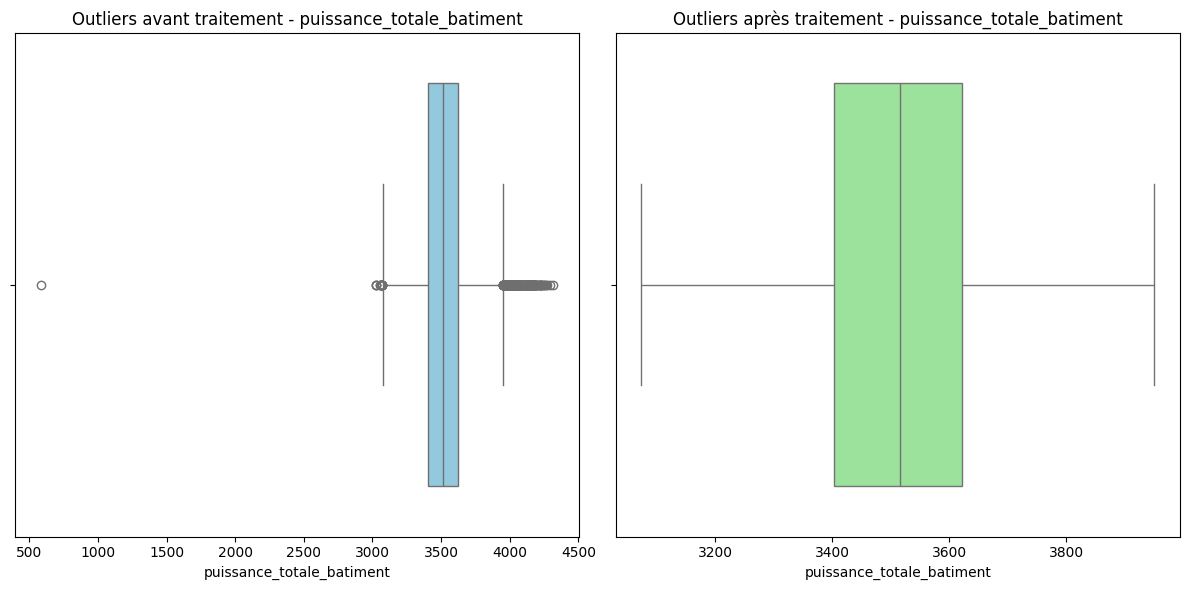

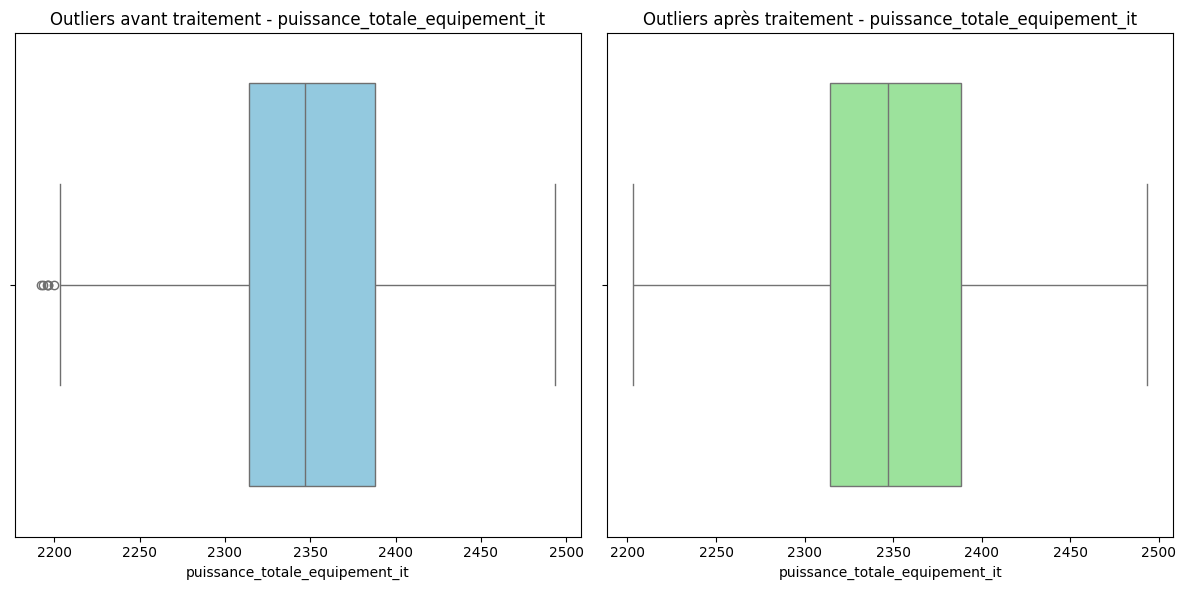

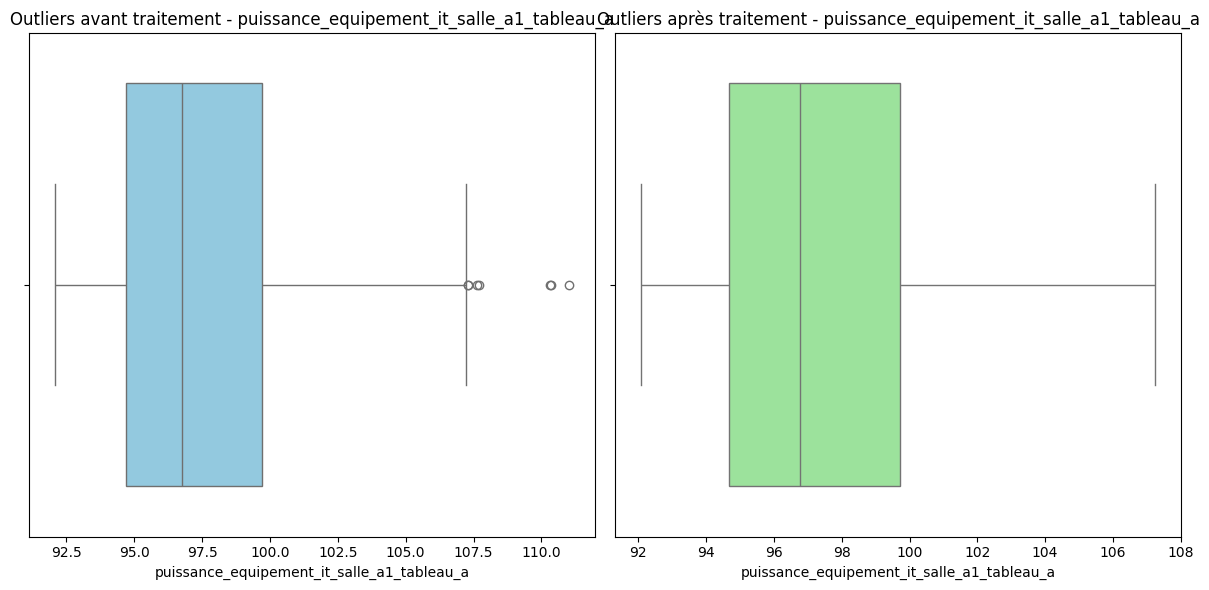

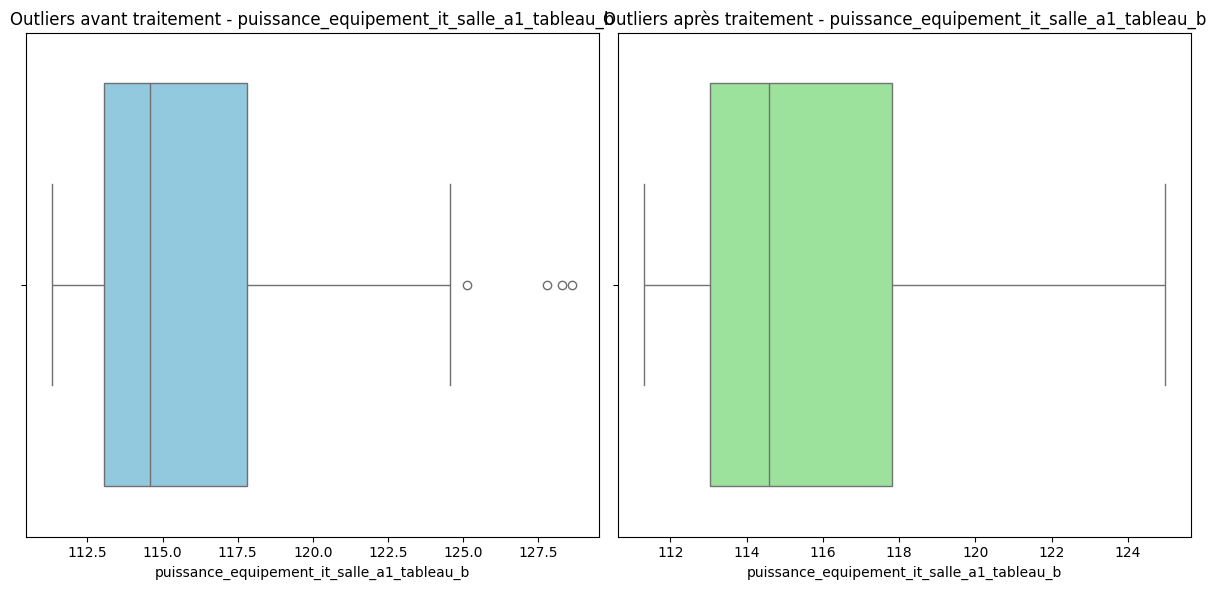

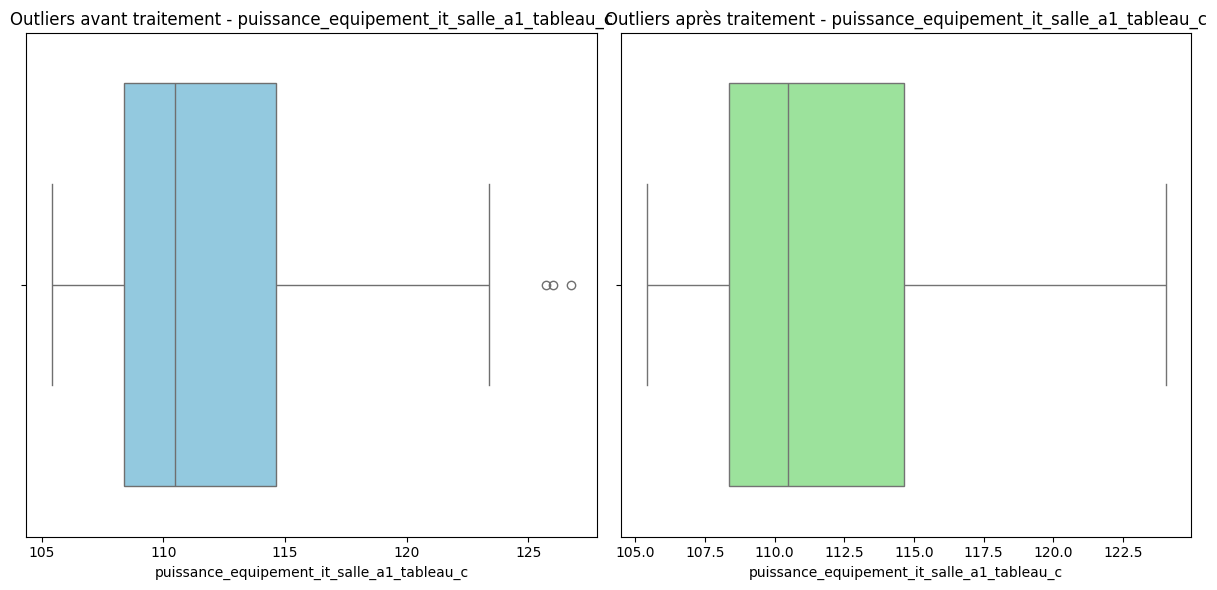

In [10]:

import matplotlib.pyplot as plt
import seaborn as sns

# Détection, analyse et traitement des outliers avec l'IQR
def detect_and_treat_outliers_iqr(data):
    results = {}
    data_treated = data.copy()

    for column in data.select_dtypes(include=[np.number]).columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identification des outliers
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
        results[column] = {
            "total_outliers": len(outliers),
            "percentage_outliers": (len(outliers) / len(data)) * 100,
            "outliers_values": outliers.tolist()
        }

        # Traitement des outliers : remplacement des valeurs hors bornes
        data_treated[column] = np.where(
            data[column] < lower_bound, lower_bound,
            np.where(data[column] > upper_bound, upper_bound, data[column])
        )

    return pd.DataFrame.from_dict(results, orient='index'), data_treated

# Fonction pour afficher les graphiques avant et après traitement
def plot_outliers_before_after(data, data_treated, columns):
    for column in columns:
        plt.figure(figsize=(12, 6))

        # Avant traitement
        plt.subplot(1, 2, 1)
        sns.boxplot(x=data[column], color='skyblue')
        plt.title(f"Outliers avant traitement - {column}")
        plt.xlabel(column)

        # Après traitement
        plt.subplot(1, 2, 2)
        sns.boxplot(x=data_treated[column], color='lightgreen')
        plt.title(f"Outliers après traitement - {column}")
        plt.xlabel(column)

        plt.tight_layout()
        plt.show()



# Appel de la fonction pour détecter et traiter les outliers
outliers_summary, data_treated = detect_and_treat_outliers_iqr(data)

# Affichage du résumé des outliers
print(outliers_summary)

# Affichage des graphiques pour les 5 premières colonnes
columns_to_plot = data.select_dtypes(include=[np.number]).columns[:5]
plot_outliers_before_after(data, data_treated, columns_to_plot)


In [11]:
print(data_treated['date'].min())
print(data_treated['date'].max())

2024-06-01 00:10:00+00:00
2024-09-30 23:50:00+00:00


In [12]:
data_treated['date'].tail()

,date
17562,2024-09-30 23:10:00+00:00
17563,2024-09-30 23:20:00+00:00
17564,2024-09-30 23:30:00+00:00
17565,2024-09-30 23:40:00+00:00
17566,2024-09-30 23:50:00+00:00


### 1.1.2 Analayse bivariee

#### 1.1.2.1 Variables numeriques vs cibles :
- Puissance consommée par chaque climatiseur (puissance_[salle]_clim_[XX]_[position])
- Débit d'air en reprise (debit_reprise_[salle]_clim_[XX]_[position])
- Débit d'air en soufflage (debit_soufflage_[salle]_clim_[XX]_[position])
- Température extérieure (temperature_exterieure)
- Humidité extérieure (humidite_exterieure)
- Température de l'air en reprise (temperature_reprise_[salle]_clim_[XX]_[position])
- Température de l'air en soufflage (temperature_soufflage_[salle]_clim_[XX]_[position])



Corrélations avec 'temperature_exterieure' pour puissance :
puissance_a1_clim_01_a1_6    0.739638
puissance_b1_clim_15_b1_4    0.685860
puissance_b2_clim_24_b2_6    0.506922
puissance_b2_clim_20_b2_2    0.425300
puissance_b1_clim_14_b1_5    0.384922
puissance_a1_clim_06_a1_1    0.364025
puissance_a2_clim_09_a2_3    0.266631
puissance_a1_clim_04_a1_3    0.233789
puissance_a1_clim_03_a1_4    0.136572
puissance_b1_clim_17_b1_2    0.121116
puissance_b2_clim_22_b2_4    0.107878
puissance_b2_clim_23_b2_5    0.085696
puissance_a2_clim_08_a2_2    0.082754
puissance_b1_clim_16_b1_3    0.080222
puissance_a1_clim_02_a1_5    0.056489
puissance_b2_clim_19_b2_1    0.030272
puissance_a1_clim_05_a1_2    0.029607
puissance_b1_clim_18_b1_1    0.016935
puissance_a2_clim_10_a2_4    0.016481
puissance_b2_clim_21_b2_3    0.003119
puissance_a2_clim_07_a2_1   -0.002554
puissance_a2_clim_11_a2_5   -0.013626
Name: temperature_exterieure, dtype: float64

Corrélations avec 'humidite_exterieure' pour puissance :


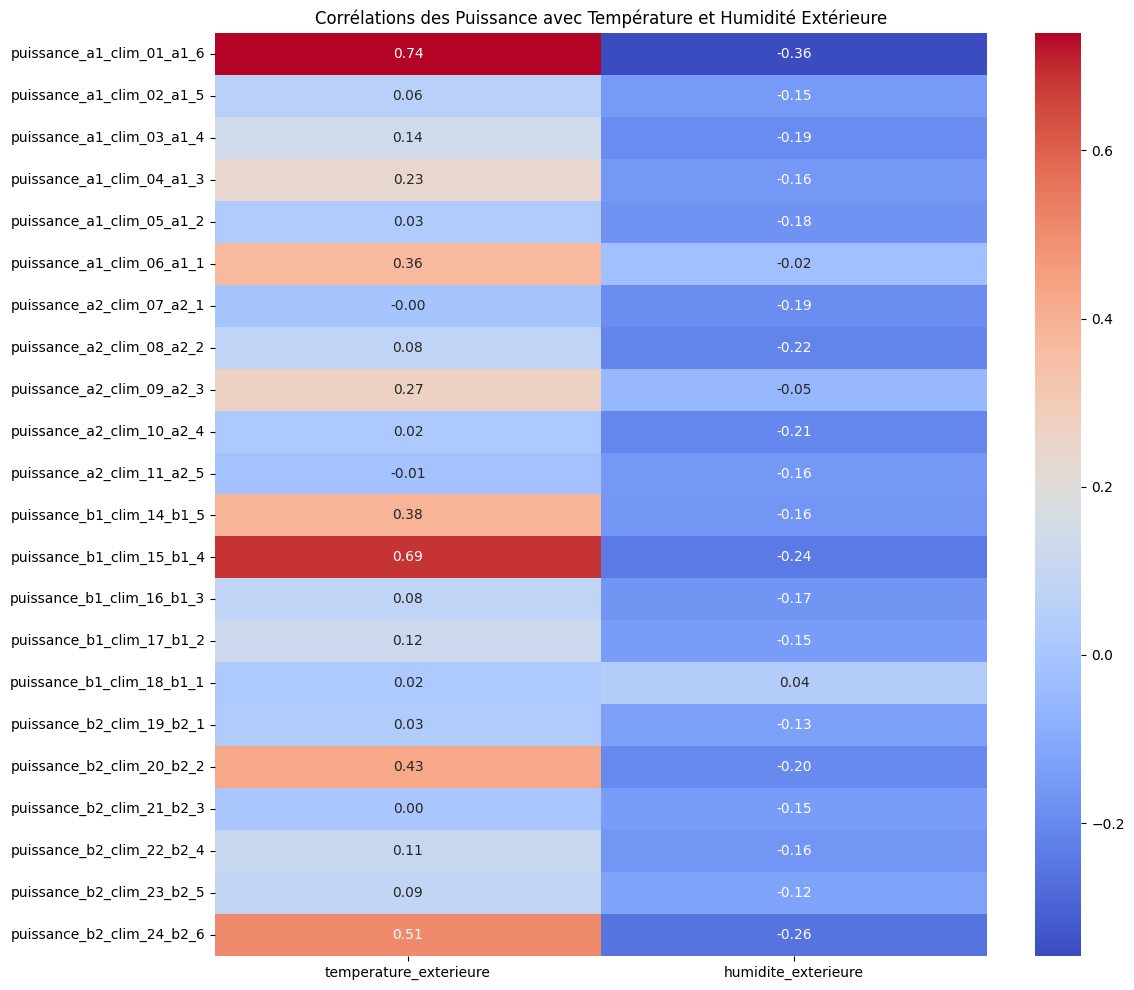


Corrélations avec 'temperature_exterieure' pour debit_reprise :
debit_reprise_a1_clim_01_a1_6    0.444680
debit_reprise_a2_clim_10_a2_4    0.319332
debit_reprise_a2_clim_09_a2_3    0.162850
debit_reprise_b2_clim_22_b2_4    0.148608
debit_reprise_a1_clim_04_a1_3    0.145786
debit_reprise_b2_clim_19_b2_1    0.091765
debit_reprise_a2_clim_07_a2_1    0.059255
debit_reprise_a2_clim_08_a2_2    0.054389
debit_reprise_a1_clim_02_a1_5    0.051245
debit_reprise_b1_clim_16_b1_3    0.042242
debit_reprise_b1_clim_14_b1_5    0.007598
debit_reprise_b2_clim_21_b2_3   -0.009685
debit_reprise_b2_clim_24_b2_6   -0.017056
debit_reprise_b2_clim_20_b2_2   -0.026053
debit_reprise_b1_clim_15_b1_4   -0.057391
debit_reprise_a1_clim_06_a1_1   -0.068513
debit_reprise_b2_clim_23_b2_5   -0.126912
debit_reprise_b1_clim_18_b1_1   -0.161506
debit_reprise_a1_clim_03_a1_4   -0.181645
debit_reprise_b1_clim_17_b1_2   -0.194976
debit_reprise_a2_clim_11_a2_5   -0.282443
debit_reprise_a1_clim_05_a1_2   -0.371684
Name: tempe

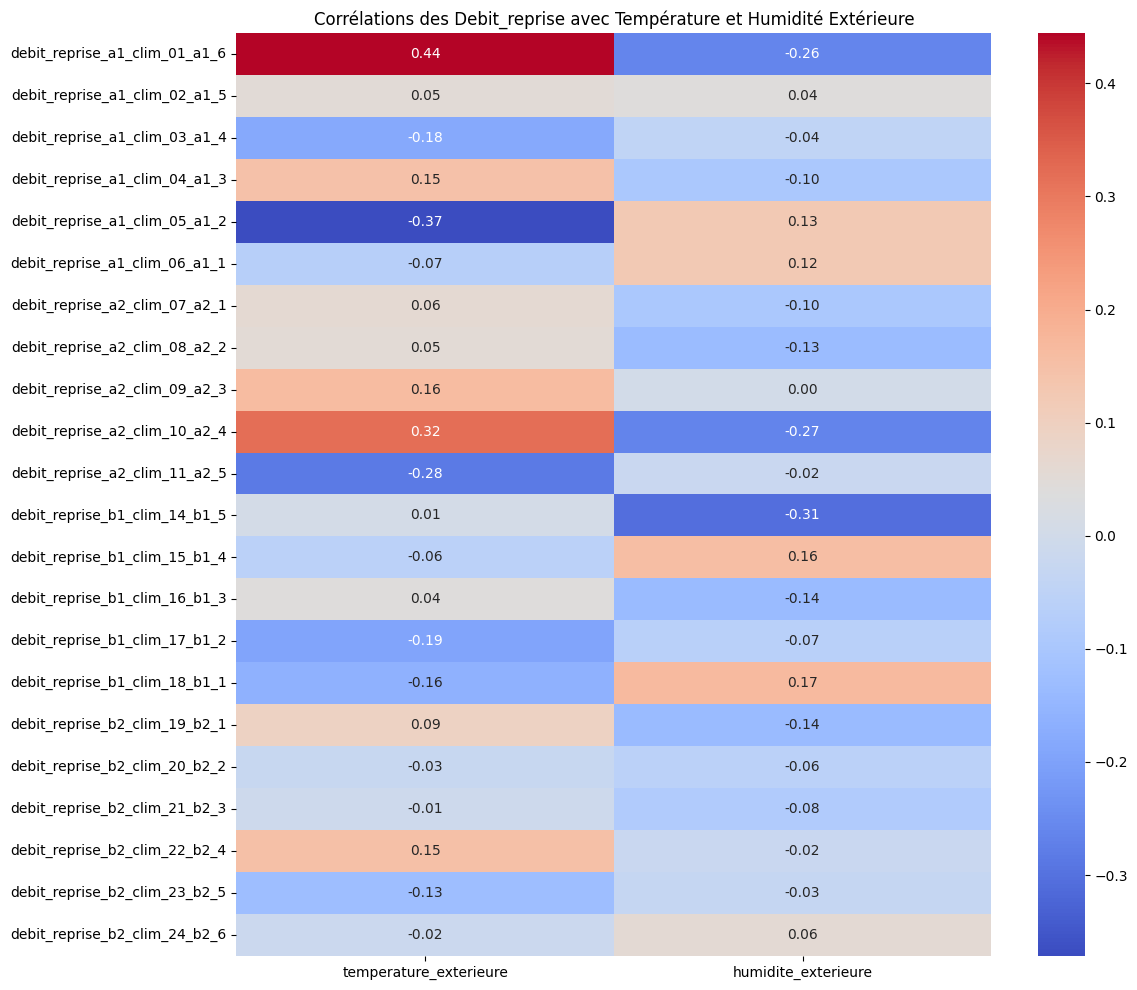


Corrélations avec 'temperature_exterieure' pour debit_soufflage :
debit_soufflage_a1_clim_01_a1_6    0.246940
debit_soufflage_a2_clim_10_a2_4    0.235248
debit_soufflage_b2_clim_22_b2_4    0.202153
debit_soufflage_a2_clim_09_a2_3    0.143378
debit_soufflage_b2_clim_24_b2_6    0.141765
debit_soufflage_a1_clim_06_a1_1    0.129681
debit_soufflage_b2_clim_19_b2_1    0.082722
debit_soufflage_a1_clim_04_a1_3    0.076229
debit_soufflage_a2_clim_07_a2_1    0.065053
debit_soufflage_a2_clim_08_a2_2    0.032519
debit_soufflage_b1_clim_16_b1_3    0.027663
debit_soufflage_b2_clim_21_b2_3    0.023855
debit_soufflage_b1_clim_14_b1_5    0.003634
debit_soufflage_b2_clim_20_b2_2   -0.036597
debit_soufflage_a1_clim_03_a1_4   -0.061205
debit_soufflage_b2_clim_23_b2_5   -0.110155
debit_soufflage_b1_clim_18_b1_1   -0.138434
debit_soufflage_a1_clim_02_a1_5   -0.141300
debit_soufflage_b1_clim_17_b1_2   -0.194014
debit_soufflage_a1_clim_05_a1_2   -0.325608
debit_soufflage_b1_clim_15_b1_4   -0.522362
Name: tem

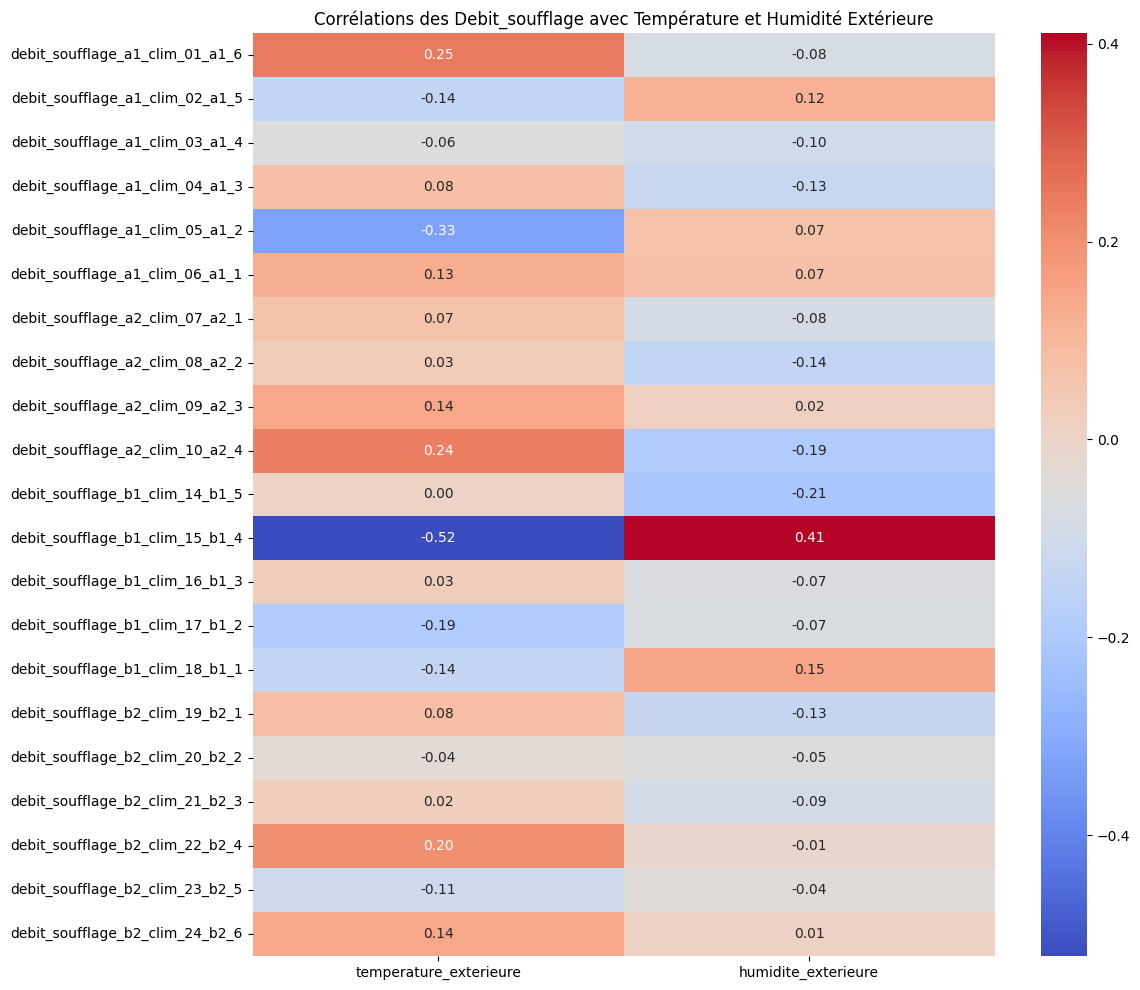


Corrélations avec 'temperature_exterieure' pour temperature_reprise :
temperature_reprise_b2_clim_20_b2_2    0.107954
temperature_reprise_b2_clim_22_b2_4    0.107890
temperature_reprise_b2_clim_19_b2_1    0.107878
temperature_reprise_b2_clim_23_b2_5    0.107619
temperature_reprise_b2_clim_24_b2_6    0.107379
temperature_reprise_b2_clim_21_b2_3    0.107283
temperature_reprise_a1_clim_01_a1_6    0.053158
temperature_reprise_a1_clim_04_a1_3    0.051807
temperature_reprise_a1_clim_02_a1_5    0.051352
temperature_reprise_a1_clim_05_a1_2    0.051212
temperature_reprise_a1_clim_06_a1_1    0.051122
temperature_reprise_a1_clim_03_a1_4    0.049331
temperature_reprise_b1_clim_15_b1_4    0.003555
temperature_reprise_b1_clim_16_b1_3    0.003394
temperature_reprise_b1_clim_17_b1_2    0.003367
temperature_reprise_b1_clim_18_b1_1    0.003282
temperature_reprise_b1_clim_14_b1_5    0.003178
temperature_reprise_a2_clim_10_a2_4   -0.029222
temperature_reprise_a2_clim_08_a2_2   -0.029235
temperature_repri

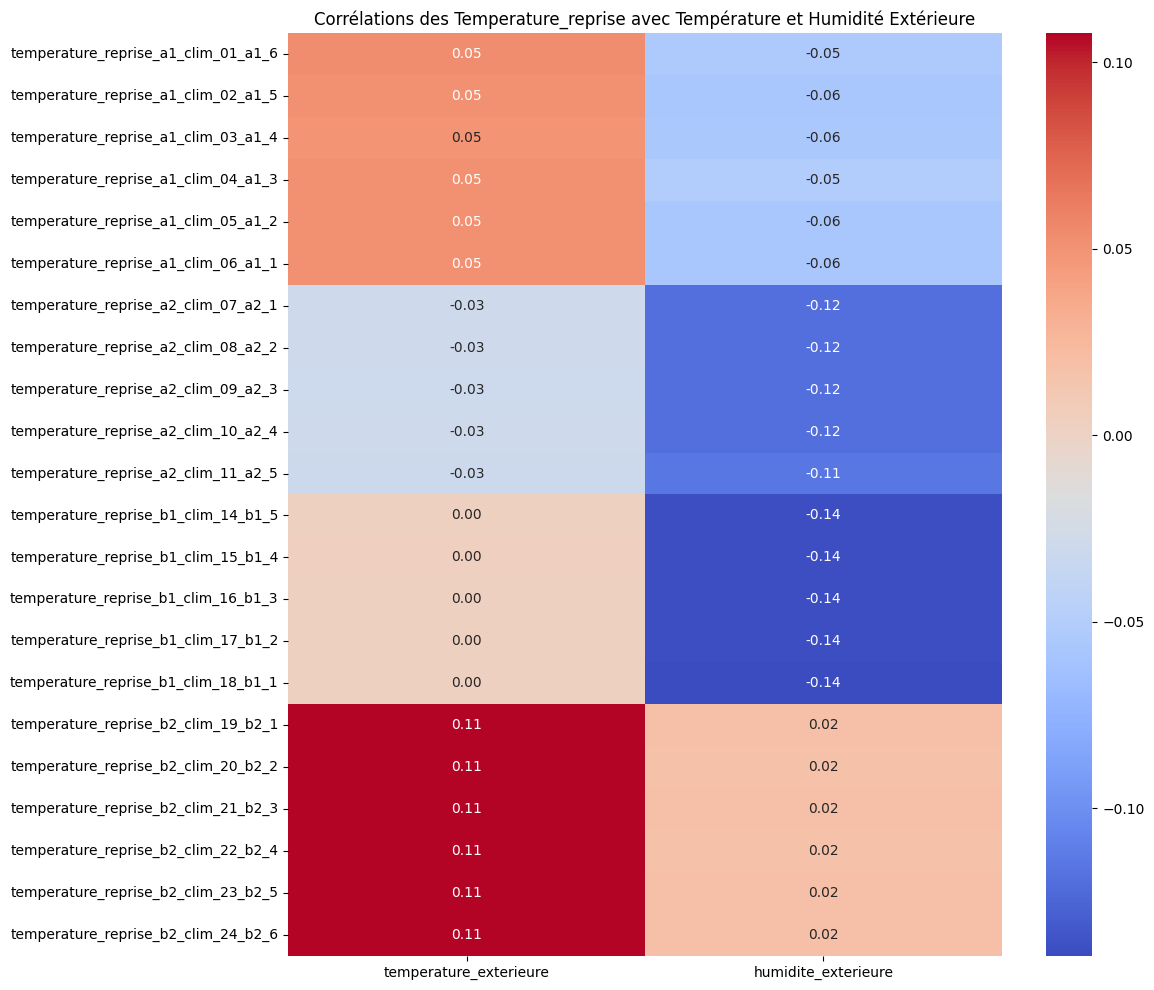


Corrélations avec 'temperature_exterieure' pour temperature_soufflage :
temperature_soufflage_b2_clim_24_b2_6    0.354039
temperature_soufflage_a2_clim_07_a2_1    0.284621
temperature_soufflage_b2_clim_23_b2_5    0.208684
temperature_soufflage_a1_clim_04_a1_3    0.207748
temperature_soufflage_a1_clim_05_a1_2    0.201872
temperature_soufflage_b2_clim_19_b2_1    0.167876
temperature_soufflage_a2_clim_08_a2_2    0.166099
temperature_soufflage_a1_clim_01_a1_6    0.133409
temperature_soufflage_a1_clim_02_a1_5    0.131819
temperature_soufflage_a2_clim_09_a2_3    0.033279
temperature_soufflage_a1_clim_03_a1_4   -0.035005
temperature_soufflage_b1_clim_14_b1_5   -0.062510
temperature_soufflage_b1_clim_15_b1_4   -0.082900
temperature_soufflage_b1_clim_16_b1_3   -0.102982
temperature_soufflage_a2_clim_11_a2_5   -0.122073
temperature_soufflage_b2_clim_20_b2_2   -0.143909
temperature_soufflage_b2_clim_21_b2_3   -0.144759
temperature_soufflage_b1_clim_17_b1_2   -0.163172
temperature_soufflage_a2_cl

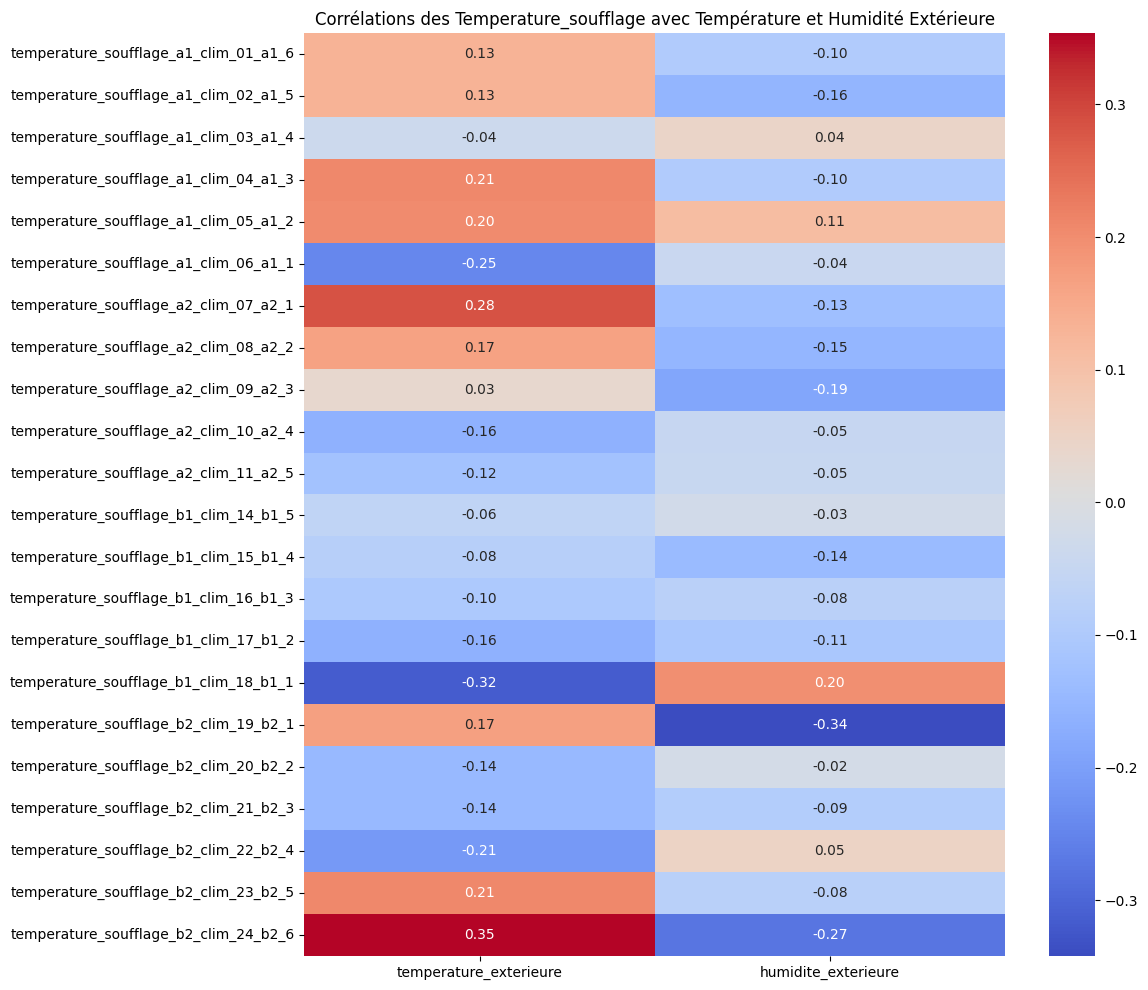

In [13]:


# Vérification et conversion de la colonne 'date' en datetime
data_treated['date'] = pd.to_datetime(data_treated['date'], errors='coerce')

# Regroupement par 'date' et calcul de la moyenne pour les variables dynamiques
data_treated_grouped = data_treated.groupby('date').mean()

# Définition des listes de salles, climatiseurs, positions et variables principales
salles = ['a1', 'a2', 'b1', 'b2']
clims = [f'clim_{i:02d}' for i in range(1, 25)]  # clim_01 à clim_24
positions = [
    'a1_1', 'a1_2', 'a1_3', 'a1_4', 'a1_5', 'a1_6',
    'a2_1', 'a2_2', 'a2_3', 'a2_4', 'a2_5', 'a2_6',
    'b1_1', 'b1_2', 'b1_3', 'b1_4', 'b1_5', 'b1_6',
    'b2_1', 'b2_2', 'b2_3', 'b2_4', 'b2_5', 'b2_6'
]
variables = ['temperature_exterieure', 'humidite_exterieure']

# Génération dynamique des noms de variables
dynamic_variables = []
for salle in salles:
    for clim in clims:
        for pos in positions:
            dynamic_variables.extend([
                f'puissance_{salle}_{clim}_{pos}',
                f'debit_reprise_{salle}_{clim}_{pos}',
                f'debit_soufflage_{salle}_{clim}_{pos}',
                f'temperature_reprise_{salle}_{clim}_{pos}',
                f'temperature_soufflage_{salle}_{clim}_{pos}'
            ])

variables.extend(dynamic_variables)

# Filtrage des variables existantes dans le DataFrame
variables_existantes = [col for col in variables if col in data_treated_grouped.columns]

# Création d'un sous-ensemble avec les variables existantes
data_treated_selected = data_treated_grouped[variables_existantes]

# Calcul de la matrice de corrélation
correlation_matrix = data_treated_selected.corr()

# Sélection des catégories spécifiques de variables pour analyse
categories = {
    "puissance": [col for col in correlation_matrix.columns if 'puissance_' in col],
    "debit_reprise": [col for col in correlation_matrix.columns if 'debit_reprise_' in col],
    "debit_soufflage": [col for col in correlation_matrix.columns if 'debit_soufflage_' in col],
    "temperature_reprise": [col for col in correlation_matrix.columns if 'temperature_reprise_' in col],
    "temperature_soufflage": [col for col in correlation_matrix.columns if 'temperature_soufflage_' in col],
}

# Analyse et affichage des corrélations pour chaque catégorie
for category, cols in categories.items():
    correlation_temperature = correlation_matrix.loc[cols, 'temperature_exterieure']
    correlation_humidite = correlation_matrix.loc[cols, 'humidite_exterieure']

    print(f"\nCorrélations avec 'temperature_exterieure' pour {category} :")
    print(correlation_temperature.sort_values(ascending=False))

    print(f"\nCorrélations avec 'humidite_exterieure' pour {category} :")
    print(correlation_humidite.sort_values(ascending=False))

    # Visualisation Heatmap
    heatmap_data = correlation_matrix.loc[cols, ['temperature_exterieure', 'humidite_exterieure']]
    plt.figure(figsize=(12, 10))
    sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
    plt.title(f'Corrélations des {category.capitalize()} avec Température et Humidité Extérieure')
    plt.tight_layout()
    plt.show()


### 1.2 Calcul du rendement de chaque unite de climatisation (unites 19 a 24) suivant toute les dates regrouper par salle (salle b2)

<ipython-input-14-61737e2cf8b9>:39: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  date_range = pd.date_range(start='2024-06-01 00:10:00+00:00', end='2024-09-30 23:50:00+00:00', freq='60T')  # Données horaires
<ipython-input-14-61737e2cf8b9>:47: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_treated[col_name] = np.random.rand(len(data_treated))
<ipython-input-14-61737e2cf8b9>:47: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_treated[col_name] = np.random.rand(len(da

Résultats pour la salle 'b2':
    clim_position  Rendement
19  clim_22_b2_20   9.483172
11  clim_20_b2_24   4.097883
32  clim_24_b2_21   1.733517
26  clim_23_b2_21   1.649510
13  clim_21_b2_20   1.267025
7   clim_20_b2_20   0.972501
24  clim_23_b2_19   0.872191
2   clim_19_b2_21   0.754800
15  clim_21_b2_22   0.387702
17  clim_21_b2_24   0.363350
25  clim_23_b2_20   0.351940
20  clim_22_b2_21   0.303192
16  clim_21_b2_23   0.255057
29  clim_23_b2_24   0.212968
30  clim_24_b2_19   0.189841
18  clim_22_b2_19   0.166686
22  clim_22_b2_23   0.150108
31  clim_24_b2_20   0.148484
21  clim_22_b2_22   0.145057
5   clim_19_b2_24   0.096097
1   clim_19_b2_20  -0.025118
35  clim_24_b2_24  -0.058570
28  clim_23_b2_23  -0.065527
12  clim_21_b2_19  -0.068196
9   clim_20_b2_22  -0.107924
0   clim_19_b2_19  -0.120311
4   clim_19_b2_23  -0.205348
33  clim_24_b2_22  -0.228261
14  clim_21_b2_21  -0.274145
34  clim_24_b2_23  -0.366827
6   clim_20_b2_19  -0.597367
27  clim_23_b2_22  -0.818530
23  clim_22_b

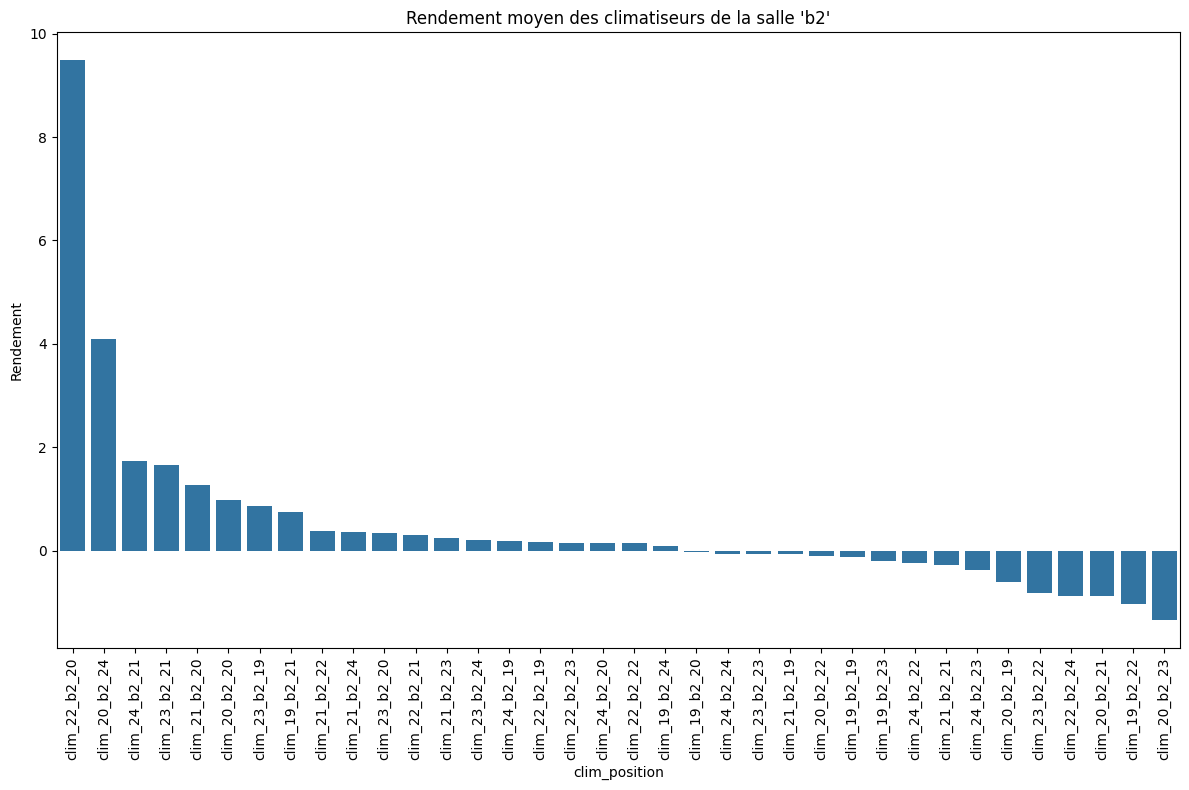

In [14]:


# Configuration des paramètres pour la salle 'b2'
salles = {
    'b2': {'clims': [f'clim_{i:02d}' for i in range(19, 25)], 'positions': [f'b2_{i}' for i in range(19, 25)]}
}

# Fonction pour calculer le rendement énergétique des climatiseurs
def calculer_rendement(data_treated, clims, positions):
    rendements = {}
    data_treated['date'] = pd.to_datetime(data_treated['date'])

    for clim in clims:
        for pos in positions:
            # Noms des colonnes dynamiques
            puissance_col = f'puissance_b2_{clim}_{pos}'
            debit_reprise_col = f'debit_reprise_b2_{clim}_{pos}'
            debit_soufflage_col = f'debit_soufflage_b2_{clim}_{pos}'
            temp_reprise_col = f'temperature_reprise_b2_{clim}_{pos}'
            temp_soufflage_col = f'temperature_soufflage_b2_{clim}_{pos}'

            # Vérification que toutes les colonnes existent
            if all(col in data_treated.columns for col in [puissance_col, debit_reprise_col, debit_soufflage_col, temp_reprise_col, temp_soufflage_col]):
                for date in data_treated['date'].unique():
                    data_day = data_treated[data_treated['date'] == date]

                    # Moyennes journalières
                    puissance = data_day[puissance_col].mean()
                    debit_reprise = data_day[debit_reprise_col].mean()
                    temp_reprise = data_day[temp_reprise_col].mean()
                    temp_soufflage = data_day[temp_soufflage_col].mean()

                    # Calcul du rendement énergétique
                    energie_utile = (temp_reprise - temp_soufflage) * debit_reprise
                    rendement = energie_utile / puissance if puissance != 0 else 0
                    rendements[f'{clim}_{pos}_{date.date()}'] = rendement

    return rendements

# Génération des données fictives
date_range = pd.date_range(start='2024-06-01 00:10:00+00:00', end='2024-09-30 23:50:00+00:00', freq='60T')  # Données horaires
data_treated = pd.DataFrame(index=date_range)

# Ajout des colonnes pour la salle 'b2'
for clim in salles['b2']['clims']:
    for pos in salles['b2']['positions']:
        for var in ['puissance', 'debit_reprise', 'debit_soufflage', 'temperature_reprise', 'temperature_soufflage']:
            col_name = f'{var}_b2_{clim}_{pos}'
            data_treated[col_name] = np.random.rand(len(data_treated))

# Ajout de la colonne 'date'
data_treated['date'] = data_treated.index

# Calcul des rendements pour la salle 'b2'
rendements = calculer_rendement(data_treated, salles['b2']['clims'], salles['b2']['positions'])

# Conversion des résultats en DataFrame
rendement_df = pd.DataFrame(list(rendements.items()), columns=['clim_position_date', 'Rendement'])
rendement_df[['clim_position', 'date']] = rendement_df['clim_position_date'].str.extract(r'([a-z0-9_]+)_(\d{4}-\d{2}-\d{2})')
rendement_df['date'] = pd.to_datetime(rendement_df['date'])

# Calcul du rendement moyen
rendement_sorted = rendement_df.groupby('clim_position')['Rendement'].mean().reset_index()
rendement_sorted = rendement_sorted.sort_values(by='Rendement', ascending=False)

# Affichage des résultats
print("Résultats pour la salle 'b2':")
print(rendement_sorted)

# Visualisation
plt.figure(figsize=(12, 8))
sns.barplot(x='clim_position', y='Rendement', data=rendement_sorted)
plt.title("Rendement moyen des climatiseurs de la salle 'b2'")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### 1.3 Analyse des données pour identier les variables qui impactent les rendements unitaires.

### 1.2	MODELE PREDICTIF

 #### 1.2.1 Modélisation statistique pour mesurer l'impact de chaque facteur sur le rendement global (SARIMAX, LIGHTGBM LSTM, GRU, Prophet) , la salle b2 a ete modelise

In [15]:
#pip install fbprophet


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
<ipython-input-16-64c3726523bb>:37: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start='2024-06-01', end='2024-09-30', freq='H')
<ipython-input-16-64c3726523bb>:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_treated[col_name] = np.random.rand(len(data_treated))
<ipython-input-16-64c3726523bb>:45: PerformanceWarning: DataFrame is highly fragmented.  This is

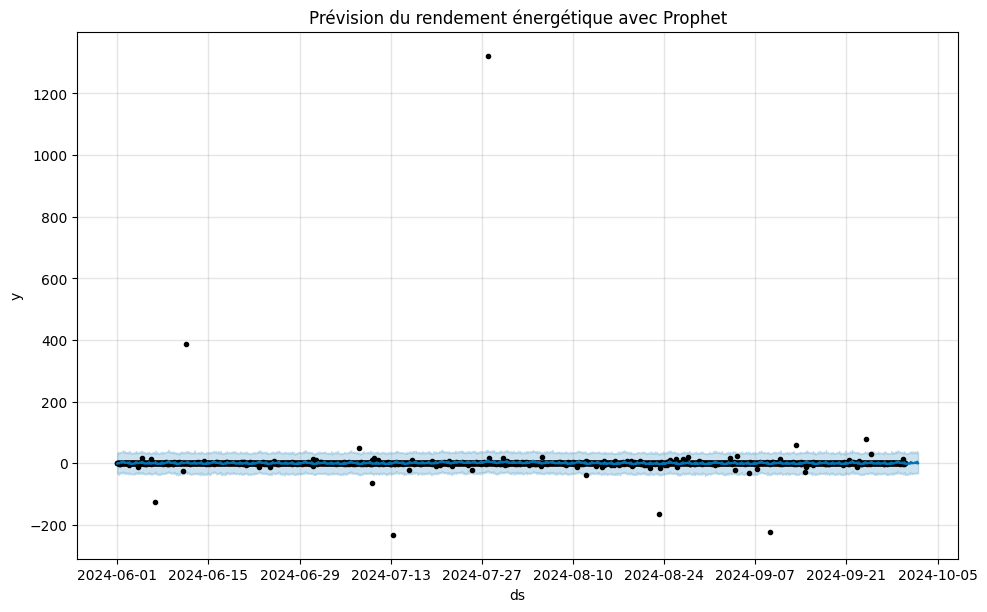

Test ADF avant différenciation : p-value = 0.0
La série est déjà stationnaire.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 2323, number of used features: 2
[LightGBM] [Info] Start training from score 0.598503


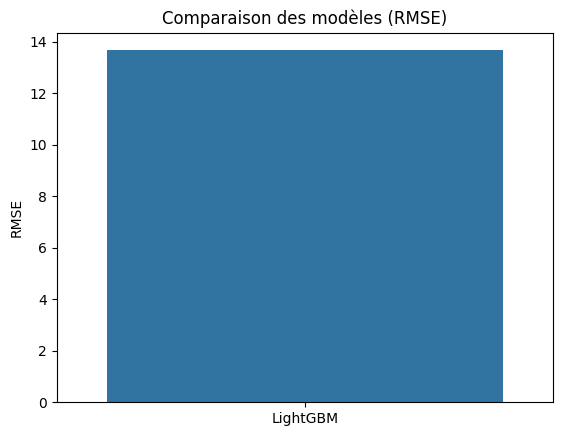

RMSE par modèle :  {'LightGBM': 13.666829824393943}


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from statsmodels.tsa.stattools import adfuller
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from prophet import Prophet

# Paramètres de configuration des salles et des climatiseurs
salles = {
    'b2': {'clims': [f'clim_{i:02d}' for i in range(19, 25)], 'positions': [f'b2_{i}' for i in range(19, 25)]}
}

# Fonction générique pour calculer le rendement énergétique des climatiseurs d'une salle
def calculer_rendement(data_treated, salle, clims, positions):
    rendements = {}
    for clim in clims:
        for pos in positions:
            puissance_col = f'puissance_{salle}_{clim}_{pos}'
            debit_reprise_col = f'debit_reprise_{salle}_{clim}_{pos}'
            temp_reprise_col = f'temperature_reprise_{salle}_{clim}_{pos}'
            temp_soufflage_col = f'temperature_soufflage_{salle}_{clim}_{pos}'

            if all(col in data_treated.columns for col in [puissance_col, debit_reprise_col, temp_reprise_col, temp_soufflage_col]):
                rendement = ((data_treated[temp_reprise_col] - data_treated[temp_soufflage_col]) *
                             data_treated[debit_reprise_col]) / data_treated[puissance_col]
                rendements[f'{clim}_{pos}'] = rendement.fillna(0)
    return pd.DataFrame(rendements)

# Génération de données fictives
date_range = pd.date_range(start='2024-06-01', end='2024-09-30', freq='H')
data_treated = pd.DataFrame(index=date_range)

for salle, config in salles.items():
    for clim in config['clims']:
        for pos in config['positions']:
            for var in ['puissance', 'debit_reprise', 'temperature_reprise', 'temperature_soufflage']:
                col_name = f'{var}_{salle}_{clim}_{pos}'
                data_treated[col_name] = np.random.rand(len(data_treated))

data_treated['date'] = data_treated.index

# Calcul des rendements
rendements = calculer_rendement(data_treated, 'b2', salles['b2']['clims'], salles['b2']['positions'])
rendements['date'] = data_treated['date']

# Sélection d'une série spécifique pour analyse
sample_clim = rendements.columns[0]  # premier climatiseur
data = rendements[['date', sample_clim]].rename(columns={sample_clim: 'Rendement'})

# Préparation des données pour Prophet
data_prophet = data.rename(columns={'date': 'ds', 'Rendement': 'y'})

# Modèle Prophet
prophet_model = Prophet()
prophet_model.fit(data_prophet)

# Prévision
future = prophet_model.make_future_dataframe(periods=48, freq='H')  # 48 heures de prévision
forecast = prophet_model.predict(future)

# Visualisation des prévisions
fig = prophet_model.plot(forecast)
plt.title("Prévision du rendement énergétique avec Prophet")
plt.show()

# Test de stationnarité (ADF)
result_adf = adfuller(data['Rendement'])
print(f"Test ADF avant différenciation : p-value = {result_adf[1]}")

if result_adf[1] > 0.05:
    print("La série n'est pas stationnaire. Différenciation en cours...")
    data['Rendement_diff'] = data['Rendement'].diff().dropna()

    # Re-test après différenciation
    result_adf_diff = adfuller(data['Rendement_diff'].dropna())
    print(f"Test ADF après différenciation : p-value = {result_adf_diff[1]}")
    if result_adf_diff[1] > 0.05:
        raise ValueError("La série reste non stationnaire malgré la différenciation.")
else:
    print("La série est déjà stationnaire.")
    data['Rendement_diff'] = data['Rendement']

# Ajout de variables explicatives fictives
data['feature1'] = np.random.rand(len(data))
data['feature2'] = np.random.rand(len(data))

# Préparation des données pour entraînement
X = data[['feature1', 'feature2']].iloc[1:]  # Ajustement pour différenciation
y = data['Rendement_diff'].iloc[1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fonction pour calculer le RMSE
def calculate_rmse(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return np.sqrt(mean_squared_error(y_test, y_pred))

# Modèles
results = {}

# LightGBM
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train_scaled, y_train)
results['LightGBM'] = calculate_rmse(lgb_model, X_test_scaled, y_test)

# Visualisation des résultats
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Comparaison des modèles (RMSE)')
plt.ylabel('RMSE')
plt.show()

print("RMSE par modèle : ", results)


 #### 1.2.2 Détermination des périodes et conditions où le rendement est le moins optimal (la salle b2 , unites 19 a 24)

 #### 1.2.3 Selection d'un modèle de prédiction du rendement avec les varibles pertinentes (LIGHTGBM)

 #### 1.2.4  Predictions du rendement de la salle b2 jusqu'au 31 decembe 2024 selon le modèle LIGHTGBM


In [17]:
#pip install lightgbm --upgrade


In [18]:
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pickle
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Configuration des salles
salles = {
    'b2': {'clims': [f'clim_{i:02d}' for i in range(19, 25)], 'positions': [f'b2_{i}' for i in range(19, 25)]}
}

# Génération des données fictives
date_range = pd.date_range(start='2024-06-01', end='2024-12-31 23:50:00', freq='60T')
data_treated = pd.DataFrame(index=date_range)

for salle, config in salles.items():
    for clim in config['clims']:
        for pos in config['positions']:
            for var in ['puissance', 'debit_reprise', 'debit_soufflage', 'temperature_reprise', 'temperature_soufflage']:
                col_name = f'{var}_{salle}_{clim}_{pos}'
                data_treated[col_name] = np.random.rand(len(data_treated))

data_treated['date'] = data_treated.index

# Simulation de rendement fictif
rendements = []
for clim in salles['b2']['clims']:
    for pos in salles['b2']['positions']:
        rendement_col = f'rendement_{clim}_{pos}'
        data_treated[rendement_col] = np.random.rand(len(data_treated))
        rendements.append(rendement_col)

rendement_data = data_treated[rendements].copy()
rendement_data['date'] = data_treated['date']

# Exemple d'utilisation : une série de rendement
sample_rendement_col = rendements[0]
data = rendement_data[['date', sample_rendement_col]].rename(columns={sample_rendement_col: 'Rendement'})

# Test de stationnarité
result = adfuller(data['Rendement'].dropna())
if result[1] > 0.05:
    data['Rendement_diff'] = data['Rendement'].diff()
    data = data.dropna()
else:
    data['Rendement_diff'] = data['Rendement']

# Ajout de variables explicatives fictives
data['feature1'] = np.random.rand(len(data))
data['feature2'] = np.random.rand(len(data))

# Préparation des données
X = data[['feature1', 'feature2']]
y = data['Rendement_diff']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modèle LightGBM
lgb_model = LGBMRegressor()
lgb_model.fit(X_train_scaled, y_train)

# Évaluation
y_pred = lgb_model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE LightGBM : {rmse}")

# Enregistrement du scaler et du modèle
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open('lgb_model.pkl', 'wb') as model_file:
    pickle.dump(lgb_model, model_file)

# Génération des prédictions jusqu'au 31 décembre 2024
future_dates = pd.date_range(start='2024-10-01', end='2024-12-31 23:50:00', freq='60T')
future_data = pd.DataFrame(index=future_dates)
future_data['feature1'] = np.random.rand(len(future_data))
future_data['feature2'] = np.random.rand(len(future_data))

# Normalisation des données futures
future_data_scaled = scaler.transform(future_data)

# Prédictions
future_predictions = lgb_model.predict(future_data_scaled)

# Sauvegarde des résultats
future_data['Prediction_Rendement'] = future_predictions
future_data.to_csv('future_predictions.csv', index_label='date')

print("Les prédictions ont été générées et sauvegardées dans 'future_predictions.csv'.")


<ipython-input-18-7178f7f4a378>:17: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  date_range = pd.date_range(start='2024-06-01', end='2024-12-31 23:50:00', freq='60T')
<ipython-input-18-7178f7f4a378>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_treated[col_name] = np.random.rand(len(data_treated))
<ipython-input-18-7178f7f4a378>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_treated[col_name] = np.random.rand(len(data_treated))
<ipython-input-18-7178f7f4a3

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 4108, number of used features: 2
[LightGBM] [Info] Start training from score 0.504291
RMSE LightGBM : 0.2964630129932668
Les prédictions ont été générées et sauvegardées dans 'future_predictions.csv'.


<ipython-input-18-7178f7f4a378>:82: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  future_dates = pd.date_range(start='2024-10-01', end='2024-12-31 23:50:00', freq='60T')


<ipython-input-19-f0f34a75c72f>:14: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  date_range = pd.date_range(start='2024-06-01', end='2024-12-31 23:50:00', freq='60T')
<ipython-input-19-f0f34a75c72f>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_treated[col_name] = np.random.rand(len(data_treated))
<ipython-input-19-f0f34a75c72f>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_treated[col_name] = np.random.rand(len(data_treated))
<ipython-input-19-f0f34a75c7

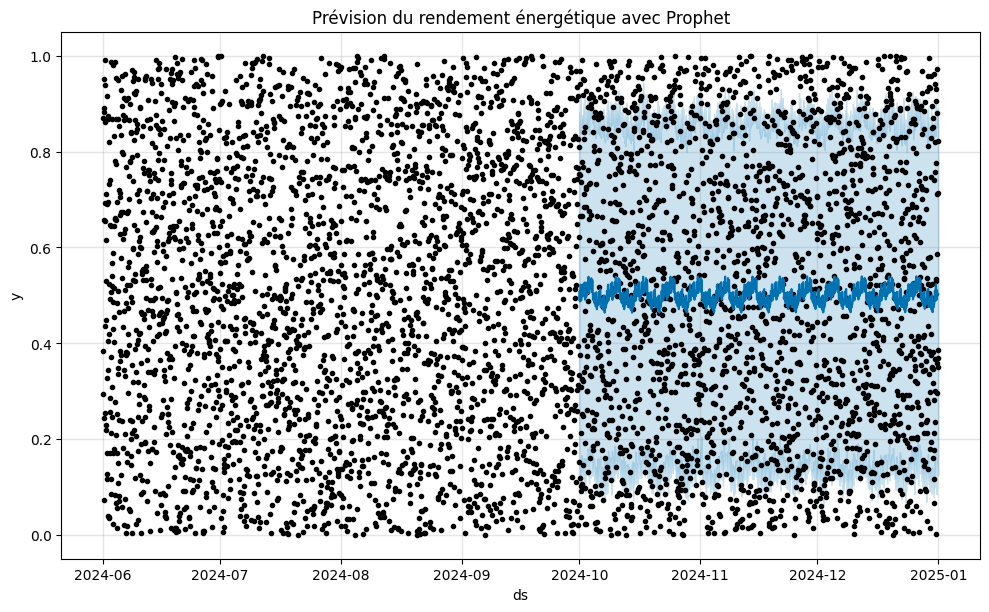

Les prédictions ont été générées et sauvegardées dans 'future_predictions_prophet.csv'.


In [19]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from prophet import Prophet
import pickle
import matplotlib.pyplot as plt

# Configuration des salles
salles = {
    'b2': {'clims': [f'clim_{i:02d}' for i in range(19, 25)], 'positions': [f'b2_{i}' for i in range(19, 25)]}
}

# Génération des données fictives
date_range = pd.date_range(start='2024-06-01', end='2024-12-31 23:50:00', freq='60T')
data_treated = pd.DataFrame(index=date_range)

for salle, config in salles.items():
    for clim in config['clims']:
        for pos in config['positions']:
            for var in ['puissance', 'debit_reprise', 'debit_soufflage', 'temperature_reprise', 'temperature_soufflage']:
                col_name = f'{var}_{salle}_{clim}_{pos}'
                data_treated[col_name] = np.random.rand(len(data_treated))

data_treated['date'] = data_treated.index

# Simulation de rendement fictif
rendements = []
for clim in salles['b2']['clims']:
    for pos in salles['b2']['positions']:
        rendement_col = f'rendement_{clim}_{pos}'
        data_treated[rendement_col] = np.random.rand(len(data_treated))
        rendements.append(rendement_col)

rendement_data = data_treated[rendements].copy()
rendement_data['date'] = data_treated['date']

#  une série de rendement
sample_rendement_col = rendements[0]
data = rendement_data[['date', sample_rendement_col]].rename(columns={sample_rendement_col: 'Rendement'})

# Préparation des données pour Prophet
data_prophet = data.rename(columns={'date': 'ds', 'Rendement': 'y'})

# Test de stationnarité
result = adfuller(data['Rendement'].dropna())
if result[1] > 0.05:
    data_prophet['y'] = data_prophet['y'].diff().dropna()  # Différenciation si nécessaire
else:
    data_prophet['y'] = data_prophet['y']

# Modèle Prophet
prophet_model = Prophet()

# Ajustement du modèle sur les données
prophet_model.fit(data_prophet)

# Prédiction pour la période future
# Utilisation de pd.date_range pour obtenir les dates futures
future_dates = pd.date_range(start='2024-10-01', end='2024-12-31 23:50:00', freq='60T')

# Création d'un DataFrame pour les dates futures
future = pd.DataFrame(future_dates, columns=['ds'])

# Prédiction les valeurs futures
forecast = prophet_model.predict(future)

# Sauvegarde des résultats de la prévision
forecast_results = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_results.to_csv('future_predictions_prophet.csv', index=False)

# Visualisation des prévisions
fig = prophet_model.plot(forecast)
plt.title("Prévision du rendement énergétique avec Prophet")
plt.show()

print("Les prédictions ont été générées et sauvegardées dans 'future_predictions_prophet.csv'.")

# Enregistrement du modèle Prophet
with open('prophet_model.pkl', 'wb') as model_file:
    pickle.dump(prophet_model, model_file)




### 1.3	CLASSEMENT DES CLIMATISEURS PAR PERFORMANCE

#### 1.3.1	Identification des unités de refroidissement qui offrent le meilleur rapport refroidissement/consommation énergétique et celles qui sont moins performantes pour la salle b2

<ipython-input-20-572d67c67308>:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_treated[col_name] = np.random.rand(len(data_treated)) * 10  # Valeurs fictives
<ipython-input-20-572d67c67308>:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_treated[col_name] = np.random.rand(len(data_treated)) * 10  # Valeurs fictives
<ipython-input-20-572d67c67308>:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining al

Unités les plus performantes :
    clim_position    Rapport
22  clim_22_b2_23  37.506403
20  clim_22_b2_21  10.714763
14  clim_21_b2_21  10.390035

Unités les moins performantes :
    clim_position    Rapport
16  clim_21_b2_23  -8.279507
23  clim_22_b2_24 -25.802982
28  clim_23_b2_23 -78.671337


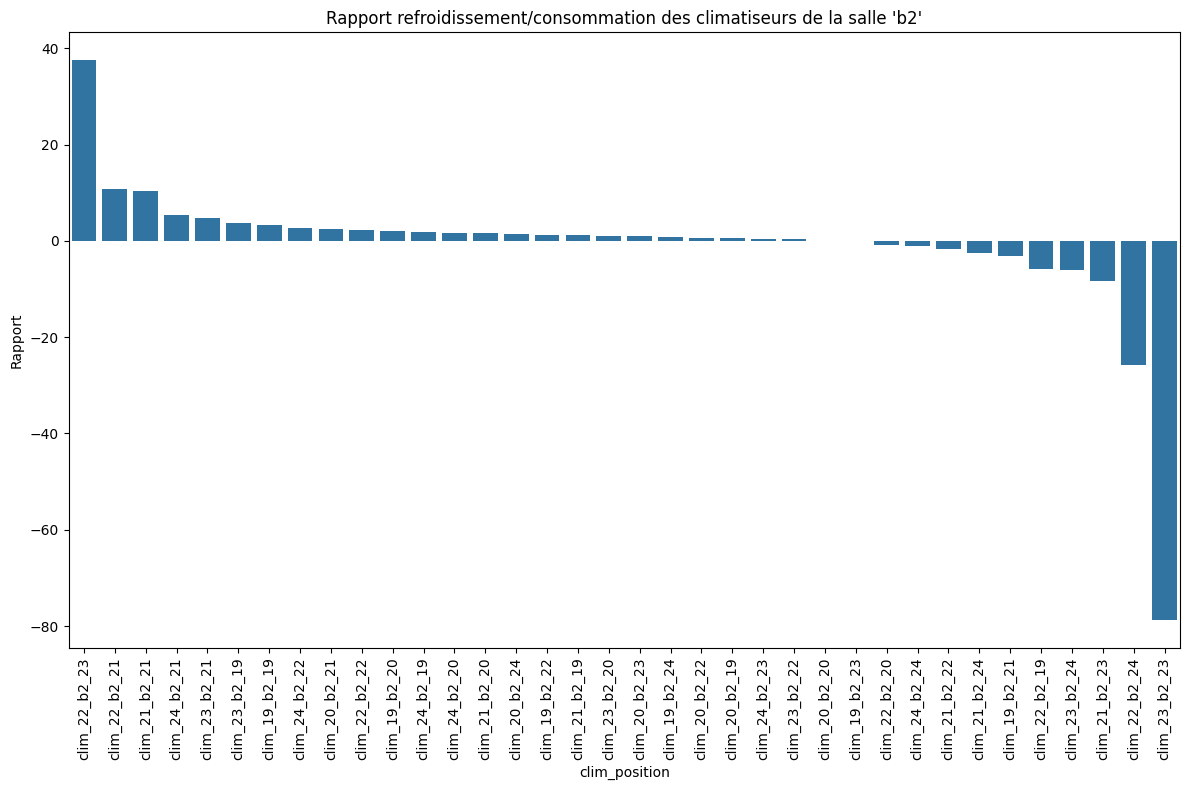

In [20]:


# Configuration des paramètres pour la salle 'b2'
salles = {
    'b2': {'clims': [f'clim_{i:02d}' for i in range(19, 25)], 'positions': [f'b2_{i}' for i in range(19, 25)]}
}

# Fonction pour calculer le rendement énergétique des climatiseurs
def calculer_rapport_refroidissement(data_treated, clims, positions):
    rapports = {}
    data_treated['date'] = pd.to_datetime(data_treated['date'])

    for clim in clims:
        for pos in positions:
            # Noms des colonnes dynamiques
            puissance_col = f'puissance_b2_{clim}_{pos}'
            debit_reprise_col = f'debit_reprise_b2_{clim}_{pos}'
            temp_reprise_col = f'temperature_reprise_b2_{clim}_{pos}'
            temp_soufflage_col = f'temperature_soufflage_b2_{clim}_{pos}'

            # Vérification que toutes les colonnes existent
            if all(col in data_treated.columns for col in [puissance_col, debit_reprise_col, temp_reprise_col, temp_soufflage_col]):
                for date in data_treated['date'].unique():
                    data_day = data_treated[data_treated['date'] == date]

                    # Moyennes journalières
                    puissance = data_day[puissance_col].mean()
                    debit_reprise = data_day[debit_reprise_col].mean()
                    temp_reprise = data_day[temp_reprise_col].mean()
                    temp_soufflage = data_day[temp_soufflage_col].mean()

                    # Calcul du refroidissement et rapport refroidissement/puissance
                    refroidissement = (temp_reprise - temp_soufflage) * debit_reprise
                    rapport = refroidissement / puissance if puissance != 0 else 0
                    rapports[f'{clim}_{pos}_{date.date()}'] = rapport

    return rapports

# Génération des données fictives
date_range = pd.date_range(start='2024-06-01', end='2024-09-30', freq='D')  # Données journalières
data_treated = pd.DataFrame(index=date_range)

# Ajout des colonnes pour la salle 'b2'
for clim in salles['b2']['clims']:
    for pos in salles['b2']['positions']:
        for var in ['puissance', 'debit_reprise', 'temperature_reprise', 'temperature_soufflage']:
            col_name = f'{var}_b2_{clim}_{pos}'
            data_treated[col_name] = np.random.rand(len(data_treated)) * 10  # Valeurs fictives

# Ajout de la colonne 'date'
data_treated['date'] = data_treated.index

# Calcul des rapports pour la salle 'b2'
rapports = calculer_rapport_refroidissement(data_treated, salles['b2']['clims'], salles['b2']['positions'])

# Conversion des résultats en DataFrame
rapport_df = pd.DataFrame(list(rapports.items()), columns=['clim_position_date', 'Rapport'])
rapport_df[['clim_position', 'date']] = rapport_df['clim_position_date'].str.extract(r'([a-z0-9_]+)_(\d{4}-\d{2}-\d{2})')
rapport_df['date'] = pd.to_datetime(rapport_df['date'])

# Calcul du rapport moyen
rapport_sorted = rapport_df.groupby('clim_position')['Rapport'].mean().reset_index()
rapport_sorted = rapport_sorted.sort_values(by='Rapport', ascending=False)

# Identification des unités les plus performantes et les moins performantes
top_units = rapport_sorted.head(3)
low_units = rapport_sorted.tail(3)

print("Unités les plus performantes :")
print(top_units)

print("\nUnités les moins performantes :")
print(low_units)

# Visualisation des résultats
plt.figure(figsize=(12, 8))
sns.barplot(x='clim_position', y='Rapport', data=rapport_sorted)
plt.title("Rapport refroidissement/consommation des climatiseurs de la salle 'b2'")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
